### PyTorch Custom Datasets

Getting our own data into PyTorch

In [48]:
# Importing dependencies and device agnostic code
import torch
from torch import nn

torch.__version__

'2.7.0+cu126'

In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [50]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [51]:
# FoodVision Mini
'''
Our dataset is a subset of the Food101 dataset.

Our datasest starts with 3 classes of food and only 75 training / 25 testing images.
'''
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Datasets")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f'{image_path} already exists!')
else:
    print(f'{image_path} doesn`t exist creating one')
    image_path.mkdir(parents=True, exist_ok=True)

# Downloading
with open(data_path / 'pizza_steak_sushi.zip', "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading food imaged data!")
    f.write(request.content)

# Unzipping
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data!")
    zip_ref.extractall(image_path)

Datasets/pizza_steak_sushi already exists!
Unzipping pizza, steak and sushi data!


## Data Preparation and Exploration

In [52]:
import os
def walk_through_dir(dir_path):
    """ 
    Walks through dir_path returning its contents
    """

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [53]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Datasets/pizza_steak_sushi'
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/train'
There are 0 directories and 75 images in 'Datasets/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'Datasets/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'Datasets/pizza_steak_sushi/train/pizza'
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/test'
There are 0 directories and 19 images in 'Datasets/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'Datasets/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'Datasets/pizza_steak_sushi/test/pizza'


In [54]:
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir # Built for prebuilt data loading in pytorch

(PosixPath('Datasets/pizza_steak_sushi/train'),
 PosixPath('Datasets/pizza_steak_sushi/test'))

### Visualizing an imge

1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class using `pathlib.Path.parent.stem`
4. Opening images with Python's PIL (Python Imaging Library)
5. Show image and print metadata

In [55]:
# Visualizing a random image
import random
from PIL import Image

torch.manual_seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # Lists all images with .jpg extensions

image_path_list

[PosixPath('Datasets/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/461689.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727491.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2603058.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1382427.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/914570.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('Da

Datasets/pizza_steak_sushi/train/sushi/686426.jpg
Random Image Path: Datasets/pizza_steak_sushi/train/sushi/686426.jpg
Image Class: sushi
Image Height: 512
Image Width: 384


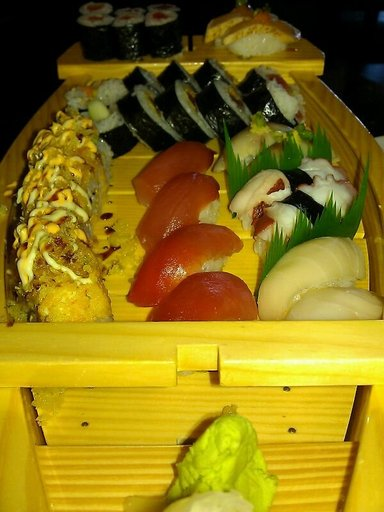

In [56]:
torch.manual_seed(42)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class
image_class = random_image_path.parent.stem
image_class

# 4. Open image
img = Image.open(random_image_path)

# 5. Print Metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

Text(0.5, 1.0, 'Image Class: sushi | Image Shape: (512, 384, 3): [ht, wt, color_channels]')

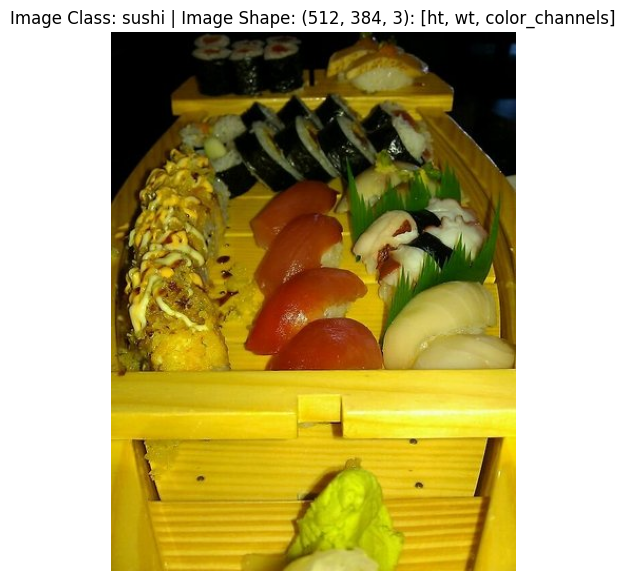

In [57]:
# Visualize using matplotlib
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis('off')
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}: [ht, wt, color_channels]")

In [58]:
img_as_array

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   4,   3],
        [  0,   4,   3],
        [  0,   4,   3]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   4,   3],
        [  0,   3,   3],
        [  0,   4,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   3,   1],
        [  0,   2,   1],
        [  0,   3,   0]],

       ...,

       [[160, 134,   0],
        [162, 136,   0],
        [166, 138,   2],
        ...,
        [216, 186,  14],
        [216, 186,  14],
        [216, 186,  14]],

       [[158, 132,   0],
        [160, 134,   0],
        [163, 137,   0],
        ...,
        [214, 183,  14],
        [213, 182,  13],
        [213, 182,  13]],

       [[157, 131,   0],
        [160, 134,   0],
        [163, 137,   0],
        ...,
        [212, 181,  12],
        [211, 180,  11],
        [210, 179,  10]]

In [59]:
# Converting all images to tensors then datasets then dataloader
# Transform parameter

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [60]:
data_transform(img)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0118, 0.0627],
         [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0118, 0.0784],
         ...,
         [0.6902, 0.7176, 0.7294,  ..., 0.8980, 0.8980, 0.8784],
         [0.6784, 0.7059, 0.7216,  ..., 0.9020, 0.8980, 0.8824],
         [0.6588, 0.6941, 0.7176,  ..., 0.8980, 0.8824, 0.8588]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0118, 0.1137],
         [0.0039, 0.0039, 0.0000,  ..., 0.0039, 0.0275, 0.1608],
         ...,
         [0.5686, 0.6078, 0.6314,  ..., 0.7725, 0.7765, 0.7569],
         [0.5647, 0.6000, 0.6275,  ..., 0.7804, 0.7765, 0.7608],
         [0.5529, 0.5882, 0.6157,  ..., 0.7765, 0.7647, 0.7373]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0314, 0.1804],
         [0.0039, 0.0039, 0.0000,  ..., 0.0078, 0.0510, 0.

In [61]:
data_transform(img).shape # From HWC to CHW when changed to Tensors

torch.Size([3, 64, 64])

In [62]:
data_transform(img).dtype

torch.float32

'\nSize is reduced so pictures are more pixelated, simpler\n\nEasier processing but might cause some loss in image details\n'

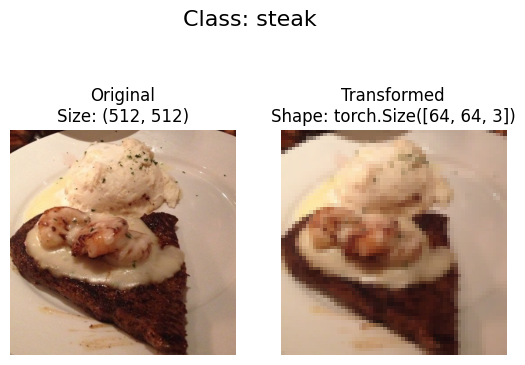

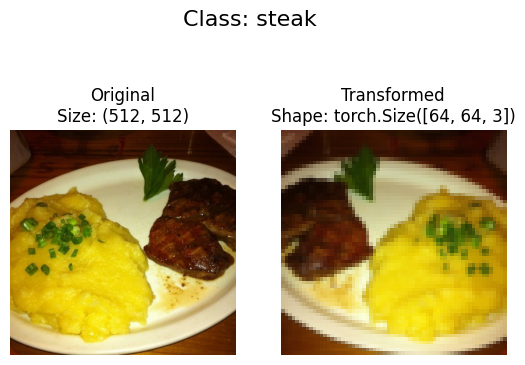

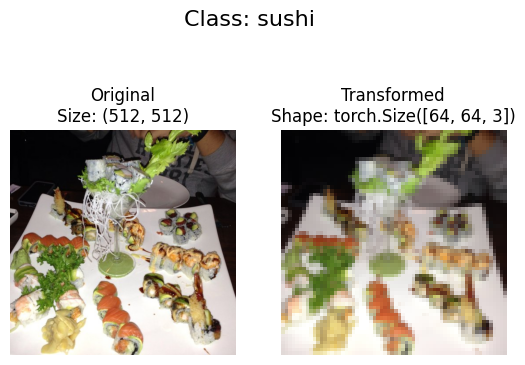

In [63]:
# Visualizing the transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2) 
            # Figure of size (1,2) -> [<Axes0>, <Axes1>], ax is to represent Axes0 and Axes1
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) 
            # Tensor: (C, H, W) but matplotlib requires (H, W, C), so permutation is done
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

"""
Size is reduced so pictures are more pixelated, simpler

Easier processing but might cause some loss in image details
"""

In [64]:
# Option 1: Loading image data using `torchvision.datasets.ImageFolder`
# For cases when data is organized in standard PyTorch format

from torchvision import datasets

# Converts entire image dataset into tensors
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # Transform for data
                                  target_transform=None) # Transform for label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Datasets/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Datasets/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [65]:
# Get class names
class_names = train_data.classes
class_names # A list

['pizza', 'steak', 'sushi']

In [66]:
class_dict = train_data.class_to_idx # Converts to dictionary
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [67]:
len(train_data), len(test_data)

(225, 75)

In [68]:
train_data.targets[0] # First is Pizza

0

In [69]:
train_data.samples[0] # A Pizza as well

('Datasets/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [70]:
# Index on the train_data Dataset to get a sisngle image and label
train_data[0] # [[[Image], Label]] Format

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [71]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [72]:
class_names[label]

'pizza'

In [73]:
# Properties of Image and Label
print(f"Image Tensor: {img}\nImage Shape: {img.shape}\nImage Datatype: {img.dtype}")
print(f"Image Label: {label}\nLabel Class: {class_names[label]}\nLabel Datatype: {type(label)}")

Image Tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [74]:
# Rearrange the dimensions 
img_permute = img.permute(1,2,0)

print(f"Original Shape: {img.shape}: C * H * W")
print(f"Permuted Shape: {img_permute.shape}: H * W * C")    

Original Shape: torch.Size([3, 64, 64]): C * H * W
Permuted Shape: torch.Size([64, 64, 3]): H * W * C


Text(0.5, 1.0, 'pizza')

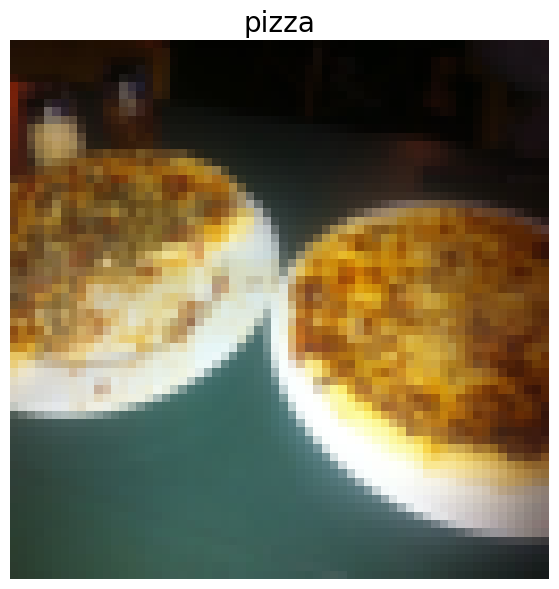

In [75]:
# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=20)

# Pixelated Pizza 64 by 64 Pixels only

In [76]:
# Assigning CPU count for data loading
import os
os.cpu_count()

8

In [77]:
# Creating a Train/Test DataLoader
# DataLoader helps us turn the dataset into iterables of specific batch sizes
# So the model can see the images in batches

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

len(train_dataloader), len(test_dataloader) # When Batch Size is 1

(8, 3)

In [78]:
# Batch Size 32
len(train_dataloader), len(test_dataloader)

(8, 3)

In [79]:
img, label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}") # [Batch Size, C, H, W]
print(f"Label Shape: {label.shape}") # [Batch Size]

Image Shape: torch.Size([32, 3, 64, 64])
Label Shape: torch.Size([32])


In [80]:
# Without having ImageFolder function - Loading data with a Custom Dataset

import os
import pathlib
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [81]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [82]:
# Helper Function to get class names
# Use `os.scandir()`, directory in standard image classification format

# Setup a target directory
target_directory = train_dir
print(f"Target Dir: {target_directory}")

# Get the class name from target directory
class_names_found = [entry.name for entry in os.scandir(target_directory)]
class_names_found

Target Dir: Datasets/pizza_steak_sushi/train


['steak', 'sushi', 'pizza']

In [83]:
os.scandir(target_directory), list(os.scandir(target_directory))

(<posix.ScandirIterator at 0x7f81aae56db0>,
 [<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>])

In [84]:
# Helper Function 
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: # Typing Library
    """ Finds the class folder names in a target directory """

    # 1. Get class names by scanning the directory, also checks if entry is directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}!")
    
    # 3. Create dictionary of index labels
    class_to_idx = {class_names: i for i, class_names in enumerate(classes)}
    return classes, class_to_idx # Returns Tuple

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom `Dataset` to replicate the `ImageFolder`

Subclass `torch.utils.data.Dataset`
**Steps:**

1. Init subclass with target directory, transform etc

2. Create several attributes
    - path: Paths to our images
    - transform: The transform to apply
    - classes: A list of target classes
    - class_to_idx: A dict of target classes mapped to labels

3. Create function to `load_images()`, opens an image

4. Overwrite `__len__()` method to return length of our dataset

4. Overwrite `__getitem()__` method to return a given sample when passed an index


In [85]:
# Write custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. Create class attributes

        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # All JPGs

        # Setup transform
        self.transform = transform

        # Class and class_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image: # From PIL
        """ Opens an image via a path and returns it """
        image_path = self.paths[index]
        

        """ if self.transform:
            transformed_img = self.transform(Image.open(image_path))
            return plt.imshow(transformed_img.permute(1,2,0)), plt.axis("off") """


        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        """ Returns total no. of samples """

        return len(self.paths)
    
    # 6. Overwrite __getitem__()
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]: # Img, Label = train_data[0] Format
        """ Returns the sample of data and label (X, y): Tuple Format """

        img = self.load_image(index)
        class_name = self.paths[index].parent.name # Expects path: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
            # Return data, label (X, y)
        else:
            return img, class_idx # Tensor, Labe;
        
    # 7. Viewing Transformed Image
    def transformation(self, index: int) -> Image.Image:
        if not self.transform:
            return f"No transformations possible!"
        
        img = self.load_image(index)
        transformed_img = self.transform(img).permute(1,2,0)

        return plt.imshow(transformed_img), plt.axis("off")

In [86]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

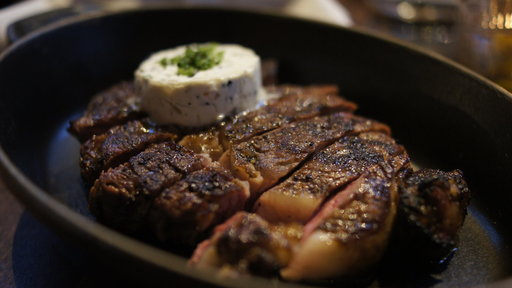

In [87]:
train_data_custom = ImageFolderCustom(targ_dir="Datasets/pizza_steak_sushi/train",
                                      transform=data_transform)

train_data_custom.load_image(index=0)

(<matplotlib.image.AxesImage at 0x7f81aac384a0>,
 (np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5)))

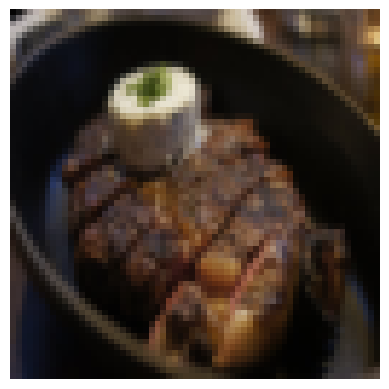

In [88]:
train_data_custom.transformation(index=0)

In [89]:
train_data_custom.__getitem__(0)

(tensor([[[0.0196, 0.0941, 0.3216,  ..., 0.4627, 0.3608, 0.3922],
          [0.1647, 0.4039, 0.6314,  ..., 0.4941, 0.3843, 0.4039],
          [0.5647, 0.6980, 0.7451,  ..., 0.5098, 0.4353, 0.4471],
          ...,
          [0.1843, 0.1490, 0.0667,  ..., 0.1843, 0.1373, 0.1333],
          [0.1765, 0.1490, 0.0706,  ..., 0.2118, 0.2235, 0.2706],
          [0.1804, 0.1608, 0.0784,  ..., 0.2863, 0.3059, 0.3412]],
 
         [[0.0157, 0.0902, 0.2980,  ..., 0.3294, 0.2353, 0.2549],
          [0.1647, 0.3843, 0.6039,  ..., 0.3569, 0.2510, 0.2549],
          [0.5412, 0.6706, 0.7216,  ..., 0.3647, 0.2902, 0.2902],
          ...,
          [0.1647, 0.1412, 0.0863,  ..., 0.1569, 0.1098, 0.1020],
          [0.1608, 0.1412, 0.0902,  ..., 0.1765, 0.1765, 0.2196],
          [0.1608, 0.1529, 0.0980,  ..., 0.2392, 0.2549, 0.2863]],
 
         [[0.0157, 0.0902, 0.2941,  ..., 0.2157, 0.1255, 0.1216],
          [0.1765, 0.3961, 0.6039,  ..., 0.2275, 0.1255, 0.1216],
          [0.5490, 0.6745, 0.7216,  ...,

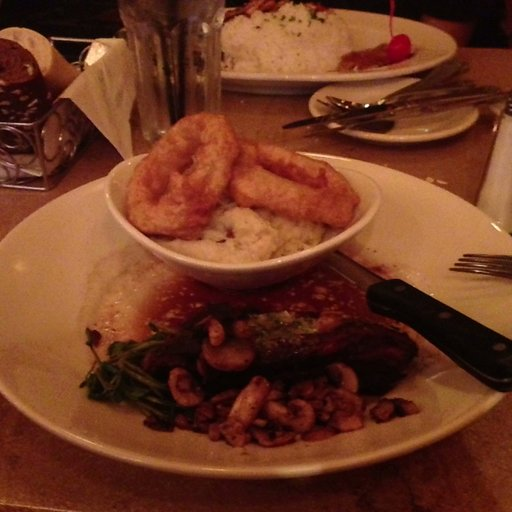

In [90]:
test_data_custom = ImageFolderCustom(targ_dir="Datasets/pizza_steak_sushi/test",
                                     transform=data_transform)

test_data_custom.load_image(index=0)

(<matplotlib.image.AxesImage at 0x7f81aaeb72f0>,
 (np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5)))

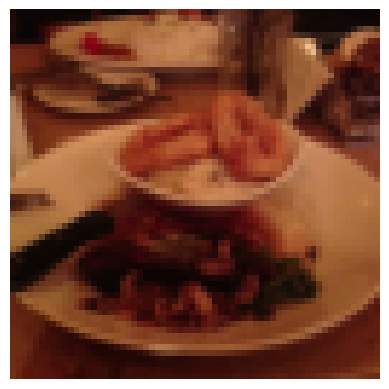

In [91]:
test_data_custom.transformation(index=0)

In [92]:
test_data_custom.__getitem__(0)

(tensor([[[0.0588, 0.0392, 0.0431,  ..., 0.0510, 0.0510, 0.1333],
          [0.0510, 0.0471, 0.0510,  ..., 0.0431, 0.0549, 0.1255],
          [0.0549, 0.0627, 0.0667,  ..., 0.0353, 0.0627, 0.1373],
          ...,
          [0.4588, 0.4392, 0.4392,  ..., 0.3843, 0.4157, 0.4314],
          [0.5137, 0.4863, 0.4824,  ..., 0.3569, 0.4078, 0.4353],
          [0.4235, 0.4314, 0.4510,  ..., 0.3569, 0.4039, 0.4510]],
 
         [[0.0275, 0.0275, 0.0196,  ..., 0.0196, 0.0196, 0.0275],
          [0.0235, 0.0235, 0.0235,  ..., 0.0196, 0.0235, 0.0314],
          [0.0353, 0.0314, 0.0314,  ..., 0.0157, 0.0275, 0.0314],
          ...,
          [0.1922, 0.1765, 0.1725,  ..., 0.1255, 0.1569, 0.1765],
          [0.2549, 0.2235, 0.2157,  ..., 0.0980, 0.1529, 0.1804],
          [0.1647, 0.1686, 0.1882,  ..., 0.0980, 0.1451, 0.1882]],
 
         [[0.0157, 0.0157, 0.0314,  ..., 0.0275, 0.0157, 0.0275],
          [0.0157, 0.0235, 0.0235,  ..., 0.0275, 0.0196, 0.0275],
          [0.0196, 0.0235, 0.0196,  ...,

In [94]:
# Making train and test transforms
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [95]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f81aac4c0b0>,
 <__main__.ImageFolderCustom at 0x7f81aac20140>)

In [96]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [97]:
train_data_custom.classes, test_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [98]:
train_data_custom.class_to_idx, test_data_custom.class_to_idx

({'pizza': 0, 'steak': 1, 'sushi': 2}, {'pizza': 0, 'steak': 1, 'sushi': 2})

In [114]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
        # Adjust display if n is too high
        if n > 10:
                n = 10
                display_shape = False
                print(f"The value of n is very high, so turning off display shape!")

        if seed:
                random.seed(seed)
        
        random_samples_idx = random.sample(range(len(dataset)), k=n)

        # Setup up plots
        plt.figure(figsize=(40, 15))

        # Loop through samples and display random samples
        for i, targ_sample in enumerate(random_samples_idx):
                targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

                # Adjust target image for matplotlib
                targ_image_adjust = targ_image.permute(1,2,0)

                # Now plotting the adjusted
                plt.subplot(1, n, i+1)
                plt.imshow(targ_image_adjust)
                plt.axis("off")

                if classes:
                        title = f"Class: {class_names[targ_label]}"
                        if display_shape:
                            title = title + f"\nShape: {targ_image_adjust.shape}"
                            
                plt.title(title,fontsize=10)

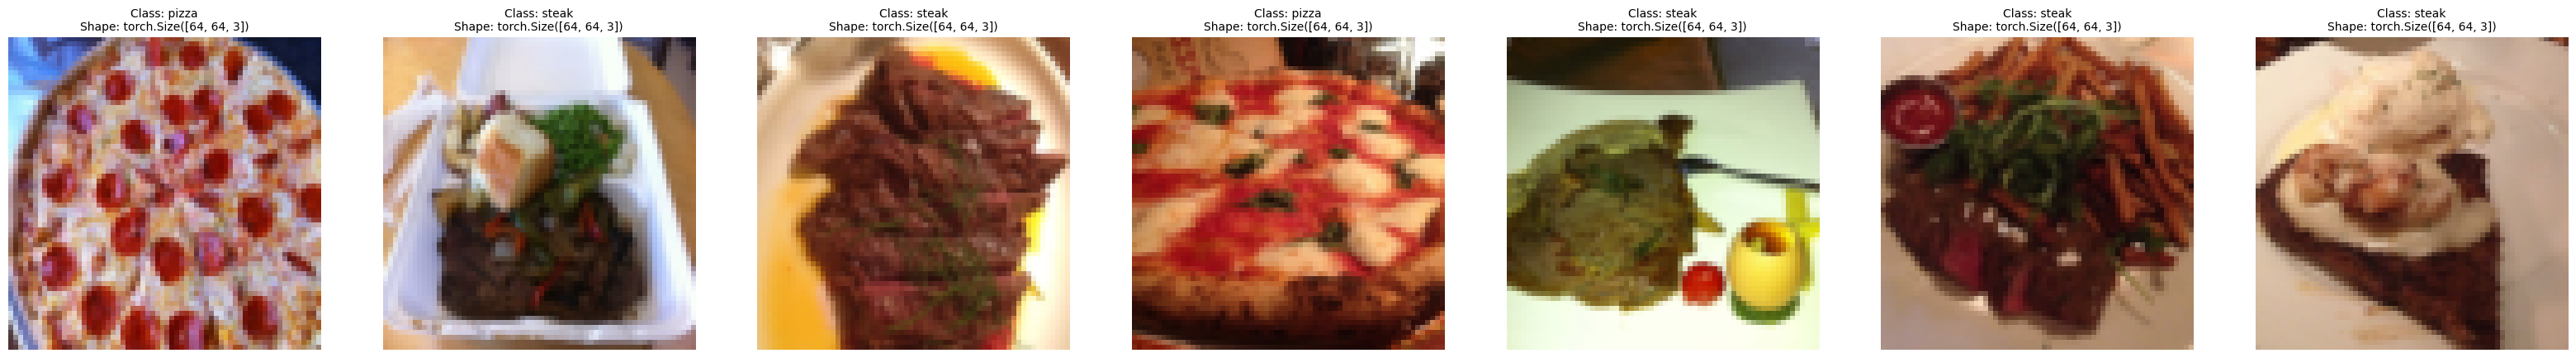

In [115]:
display_random_images(dataset=train_data_custom,
                      classes=class_names,
                      n=7,
                      seed=42)

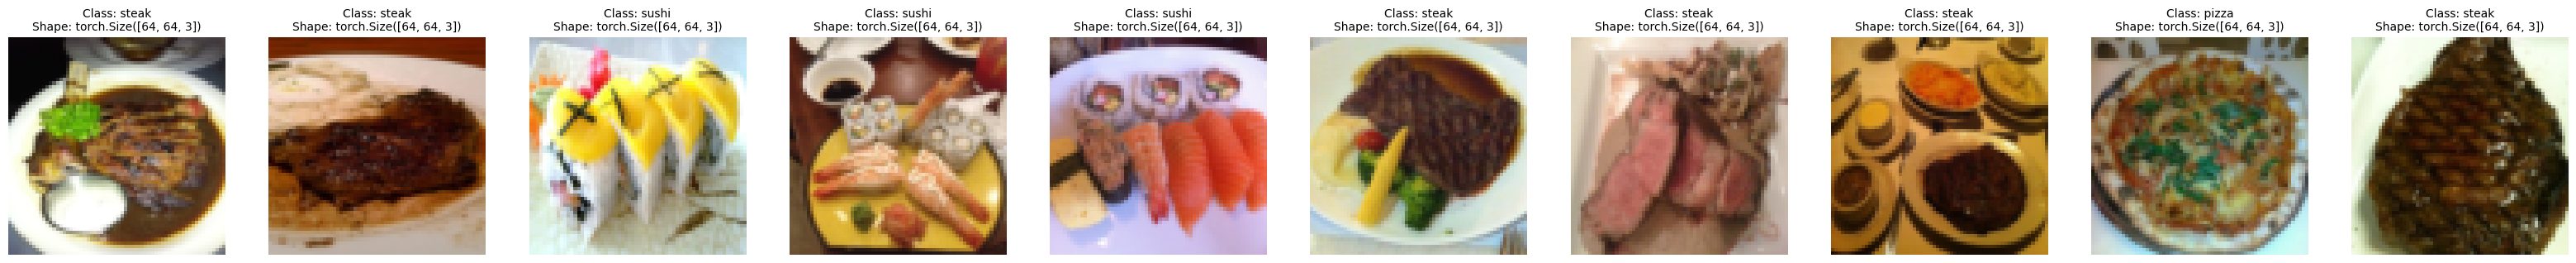

In [116]:
display_random_images(dataset=test_data_custom,
                      classes=class_names,
                      seed=42)

In [132]:
# Creating DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE=32 # Changes length of dataloader
NUM_WORKERS=os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)# No need to shuffle test data

In [133]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f81c8648920>,
 <torch.utils.data.dataloader.DataLoader at 0x7f81a85e4ec0>)

In [134]:
# Checking the image and label
img_custom, label_custom = next(iter(train_dataloader_custom)) # Single instance of dataloader

In [135]:
img_custom, label_custom

(tensor([[[[0.9020, 0.8941, 0.8902,  ..., 0.0941, 0.1059, 0.1529],
           [0.8902, 0.8824, 0.9294,  ..., 0.0745, 0.0784, 0.0980],
           [0.8667, 0.8980, 0.9569,  ..., 0.0824, 0.0902, 0.0588],
           ...,
           [0.3059, 0.2824, 0.3765,  ..., 0.2392, 0.2471, 0.2353],
           [0.4196, 0.4471, 0.3451,  ..., 0.2510, 0.2353, 0.2235],
           [0.2078, 0.2980, 0.3765,  ..., 0.2314, 0.2235, 0.2824]],
 
          [[0.9490, 0.9451, 0.9490,  ..., 0.0745, 0.0941, 0.1294],
           [0.9451, 0.9373, 0.9725,  ..., 0.0667, 0.0784, 0.0863],
           [0.9373, 0.9529, 0.9922,  ..., 0.0784, 0.0902, 0.0627],
           ...,
           [0.3137, 0.3020, 0.4000,  ..., 0.1686, 0.1647, 0.1686],
           [0.4392, 0.4706, 0.3843,  ..., 0.1765, 0.1608, 0.1608],
           [0.2392, 0.3255, 0.4078,  ..., 0.1608, 0.1529, 0.1922]],
 
          [[0.9569, 0.9608, 0.9569,  ..., 0.0588, 0.0667, 0.0863],
           [0.9490, 0.9490, 0.9765,  ..., 0.0588, 0.0588, 0.0667],
           [0.9451, 0.95

In [ ]:
img_custom.shape, label_custom.shape # Image: [batchsize, colorchannels, height, width], Label: [batchsize]

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
len(train_dataloader_custom), len(test_dataloader_custom) # 225/32, 75/32

(8, 3)

### **Data Augmentation**

Modify data to artificially increase the diversity in training set, which results in better generalization of unseen data

**Some Transforms:**

`transforms.RandAugment()`, `transforms.TrivialAugmentWide()`

These perform better than handpicked transforms

`transforms.TrivialAugmentWide()` has a main parameter `num_magnitude_bins=31`

Defines range of intensity to set a transformation from `0` to `31`

In [140]:
new_train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # How intense
    transforms.ToTensor()
])

new_test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])